#### Medical Cost Personal Insurance Project
#### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

#### Dataset Link-
#### https://github.com/dsrscientist/dataset4
#### https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\User\Desktop\medical_cost_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1228,56,male,34.43,0,no,southeast,10594.22570
1132,57,male,40.28,0,no,northeast,20709.02034
476,24,male,28.50,0,yes,northeast,35147.52848
1116,41,male,29.64,5,no,northeast,9222.40260
885,32,male,28.93,1,yes,southeast,19719.69470


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
#checking the number of unique value in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [11]:
#checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### from the above description we can observe the following:-

#### 1)The count of all values are same which means there is no missing values in all of the column.

 #### 2)The mean value is equal to the median(50%) except charges so the data is neither skewed to right nor skewed to left in age,bmi,children column.
.
#### 4)By summarizing the data we can observe that there is no much huge difference between the 75% and max hence except bmi there is no much outliers are present in age,children column.

#### 5)We acn also notice the standarddeviation,mean and 25%percentile value from the describe method.

In [13]:
#seperating numerical and catogerical column

#checking for catogerical columns
catogerical_column = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        catogerical_column.append(i)
print("catogerical columns:",catogerical_column) 
print("\n")

#checking for numerical columns
numerical_column = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_column.append(i)
print("numerical columns:",numerical_column) 

        

catogerical columns: ['sex', 'smoker', 'region']


numerical columns: ['age', 'bmi', 'children', 'charges']


### Data visualization

#### univariate analysis

<AxesSubplot:>

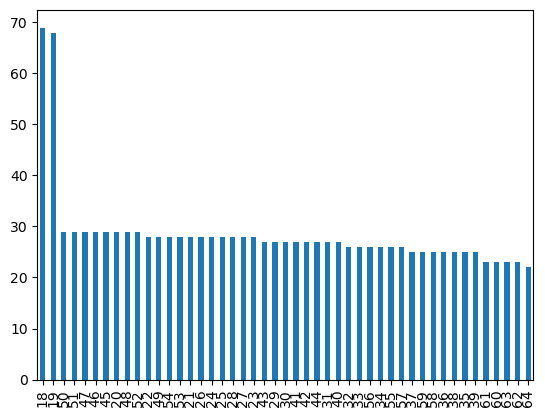

In [14]:

df['age'].value_counts().plot(kind='bar')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

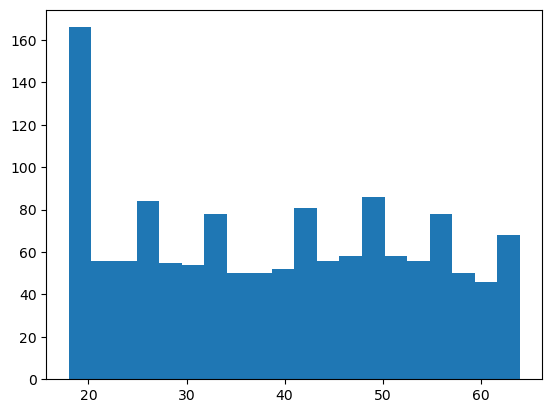

In [15]:
plt.hist(df['age'],bins=20)
df['age'].value_counts()

#### from the above 2 graph we can see that in the age of 18,19 most of the people have taken the health insurance.

male      676
female    662
Name: sex, dtype: int64

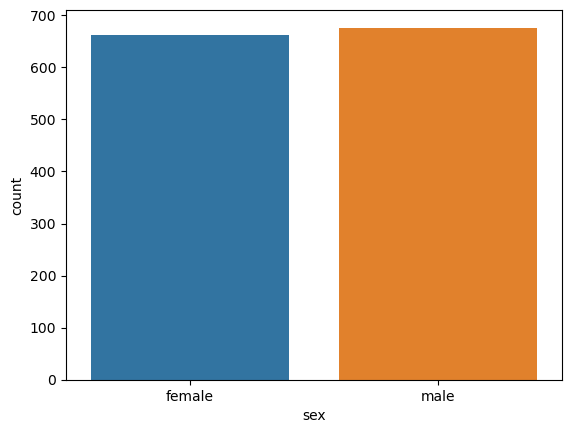

In [16]:
sns.countplot(df['sex'])
df['sex'].value_counts()

#### The count of male and female are almost same

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

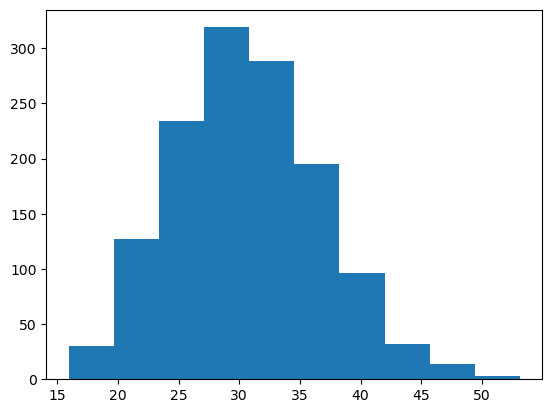

In [17]:
plt.hist(df['bmi'])
df['bmi'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

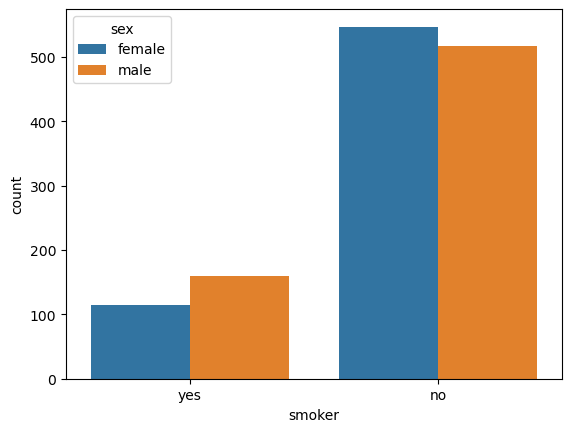

In [18]:
sns.countplot(df['smoker'],hue='sex',data=df)
df['smoker'].value_counts()

#### Non smoker count is high as compared to the smoker count.
#### Almost 100 female are smoker who have take the insurance.
#### Almost 170 male are smoker who covered health insurance.
#### 1064 both male and female are nonsmoker who have taken the health insurance

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

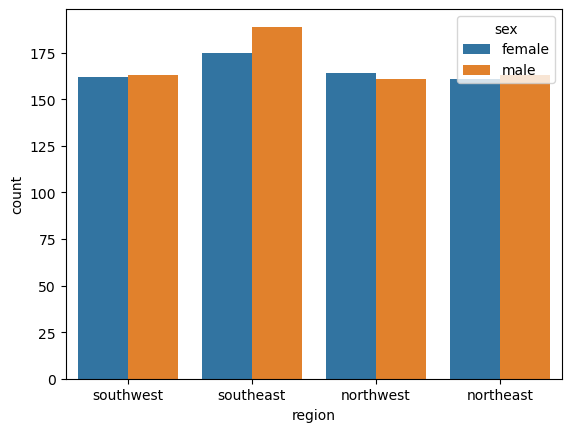

In [19]:
sns.countplot(df['region'],hue='sex',data=df)
df['region'].value_counts()

#### in southheast region 364 people taken the health insurance.
#### in southwest region 325 people taken the helth insurance.
#### in northwest region 325 people taken the health insurance.
#### in northeast region 324 people taken the health insurance.

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

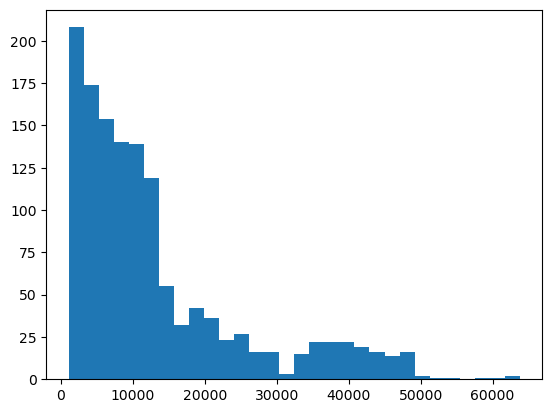

In [20]:
plt.hist(df['charges'],bins=30)
df['charges'].value_counts()

### Bivariate analysis

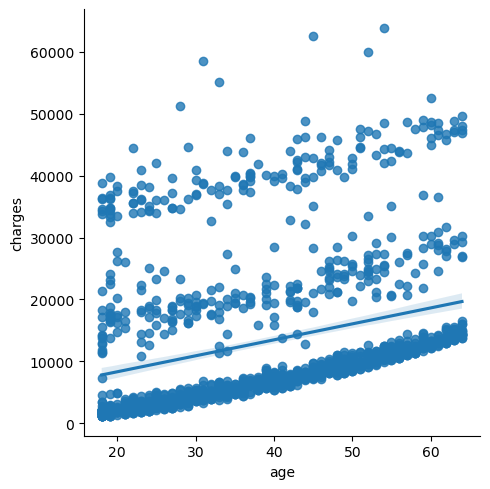

In [21]:
sns.lmplot(x="age",y="charges",data=df)
plt.show()

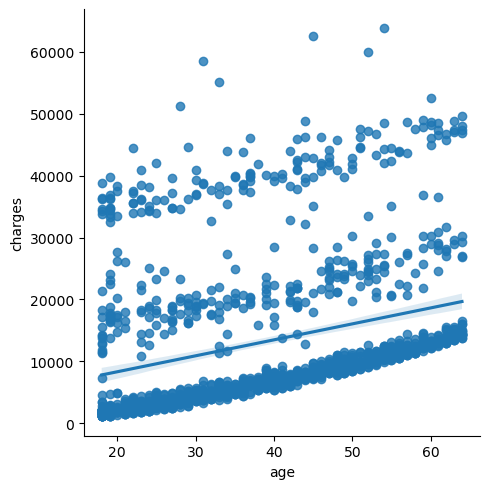

In [22]:
sns.lmplot(x="age",y="charges",data=df)
plt.show()

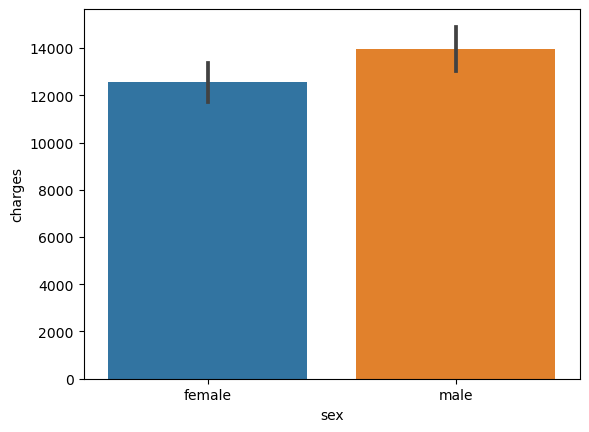

In [23]:
sns.barplot(x="sex",y="charges",data=df)
plt.show()

#### we can see form the plot that female insurance charges are less as compared to male

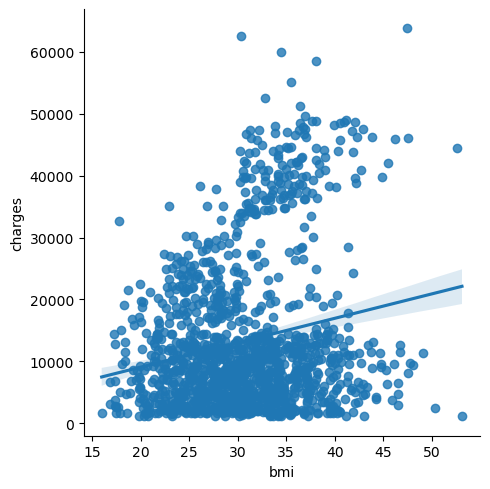

In [24]:
sns.lmplot(x="bmi",y="charges",data=df)
plt.show()

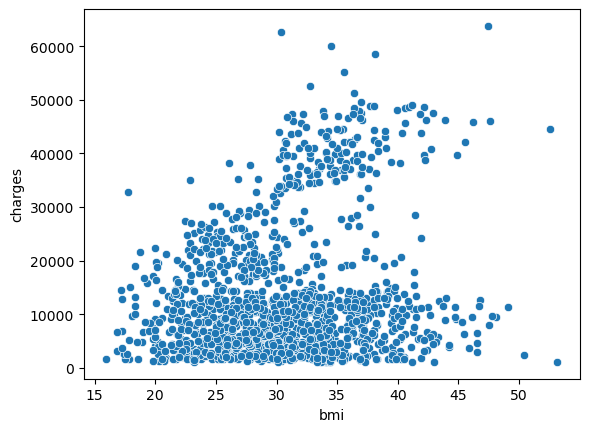

In [25]:
sns.scatterplot(x="bmi",y="charges",data=df)
plt.show()

#### bmi has positive corelation with charges but not strong.

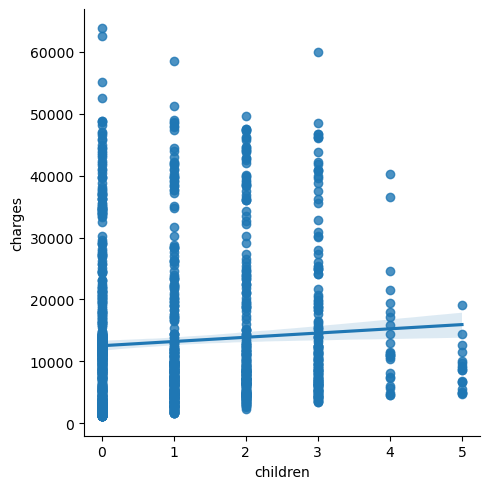

In [26]:
sns.lmplot(x="children",y="charges",data=df)
plt.show()

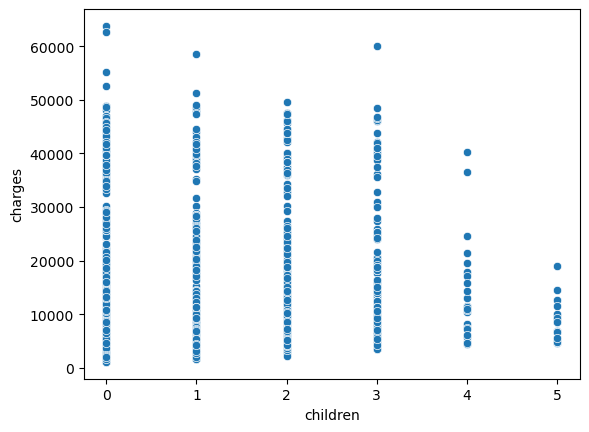

In [27]:
sns.scatterplot(x="children",y="charges",data=df)
plt.show()

##### we can see that if the number of children increses than the insurance chrges decreses

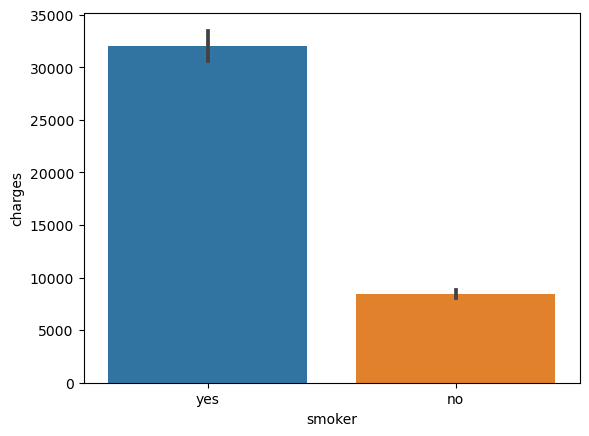

In [28]:
sns.barplot(x="smoker",y="charges",data=df)
plt.show()

#### we can see smoker person have more charges as compaired to non smoker person

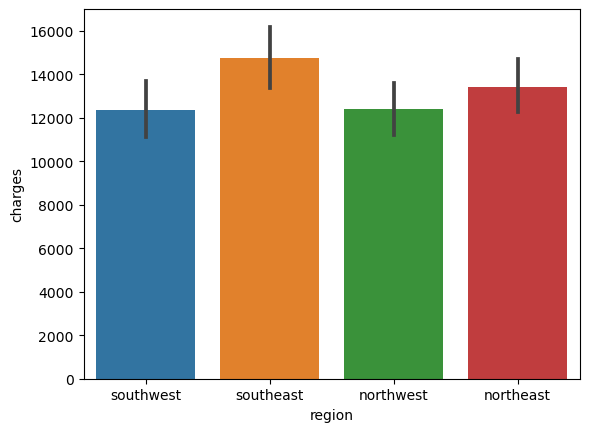

In [29]:
sns.barplot(x="region",y="charges",data=df)
plt.show()

#### we can see southeast region person has more charges then northeast and southwest and northwest person have equal charges.

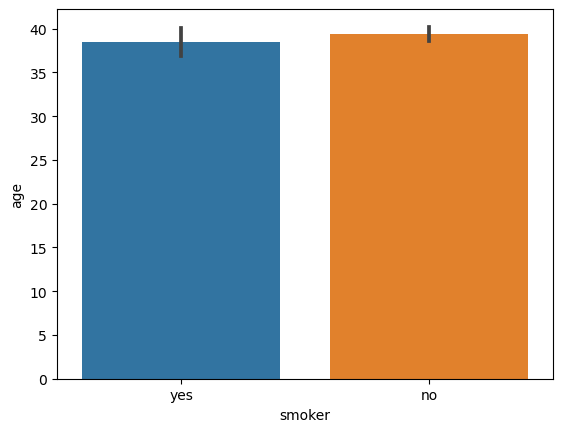

In [30]:
sns.barplot(x="smoker",y="age",data=df)
plt.show()

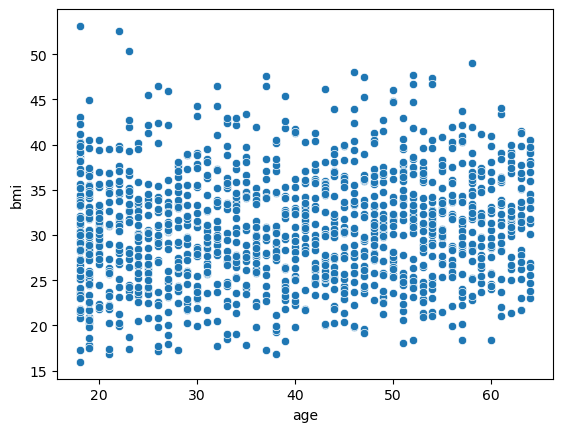

In [31]:
sns.scatterplot(x="age",y="bmi",data=df)
plt.show()

### Multivarient analysis


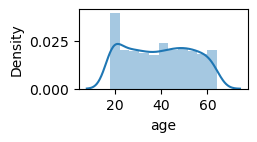

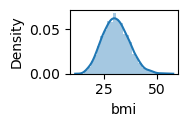

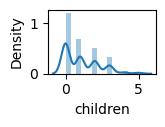

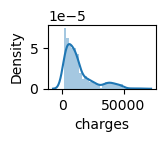

In [32]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in numerical_column:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()

In [33]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

#### We can see that in children columns and in charges columns data is skewed to right we can deal this in later

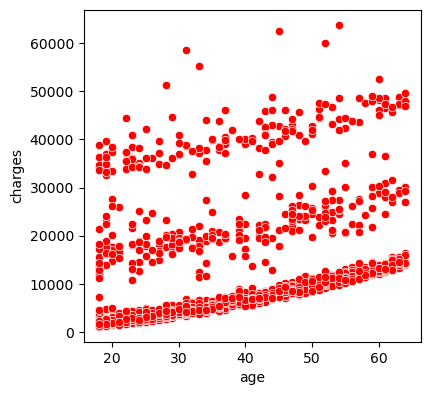

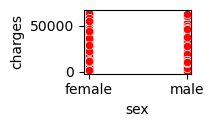

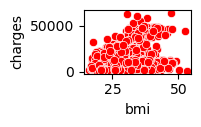

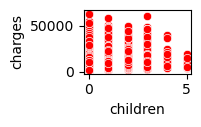

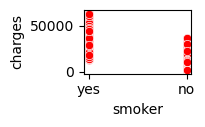

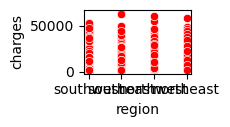

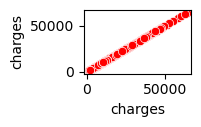

In [34]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=17:
        plt.subplot(5,4,plotnumber)
        sns.scatterplot(x=i,y='charges',data=df,color='r')
        
    plotnumber+=1
    plt.show()
    
    

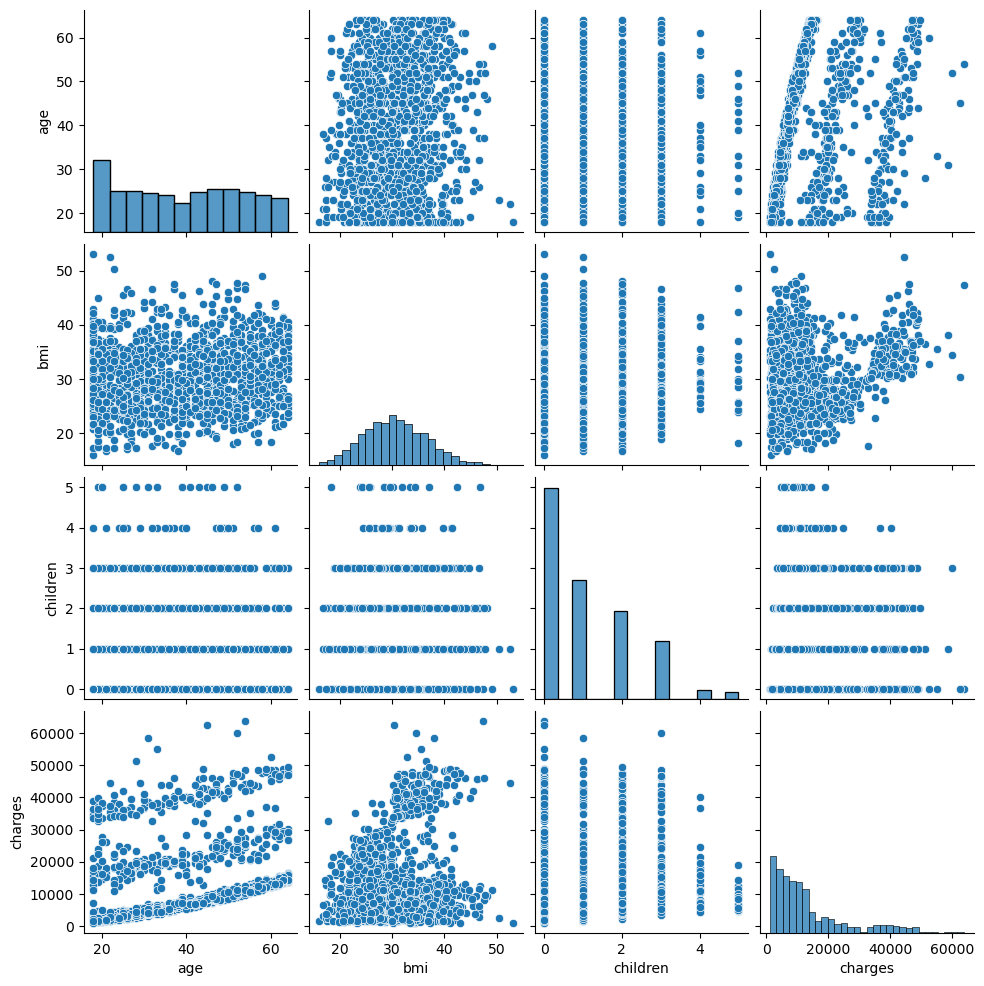

In [35]:
sns.pairplot(data=df,palette="Dark2")

### checking for outliers

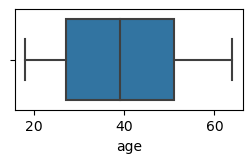

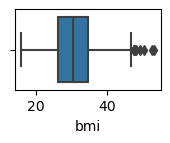

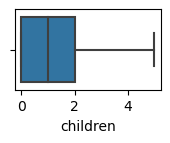

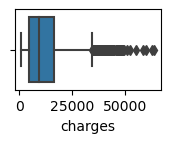

In [36]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in numerical_column:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[col])
        
        plotnumber+=1
        plt.show()

#### We can see from the graph that in the column bmi and charges there are outliers but charges column is the traget variable so there is no need to remove the outliers so we can remove the outliers in the bmi column.

In [37]:
from scipy.stats import zscore
out_features=df[['bmi']]
z=np.abs(zscore(out_features))
z

,bmi
0,0.453320
1,0.509621
2,0.383307
3,1.305531
4,0.292556
...,...
1333,0.050297
1334,0.206139
1335,1.014878
1336,0.797813


In [38]:
np.where(z>3)

(array([ 116,  847, 1047, 1317], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

In [39]:
df1=df[(z<3).all(axis=1)]
df1.shape

(1334, 7)

In [40]:
#shape of old and new DataFrame
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 1338
New Data Frame- 1334


In [41]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 0.29895366218236175


In [42]:
df=df1

#### Lets check how the data is distributed in each column

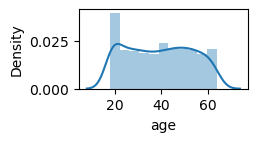

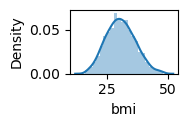

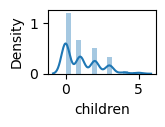

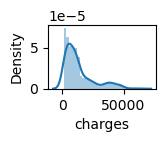

In [43]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in numerical_column:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()

In [44]:
df.skew()

age         0.053603
bmi         0.205622
children    0.935415
charges     1.517663
dtype: float64

#### we observe that in the column children and charges the data is right skewed but charges is the trget variable so we dont remove the skewness in the column lets remove the skewness in the children column.

In [45]:
#removing skewness using cuberoot method
df['children']=np.cbrt(df['children'])

In [46]:
df.skew()

age         0.053603
bmi         0.205622
children   -0.098167
charges     1.517663
dtype: float64

<AxesSubplot:xlabel='children', ylabel='Density'>

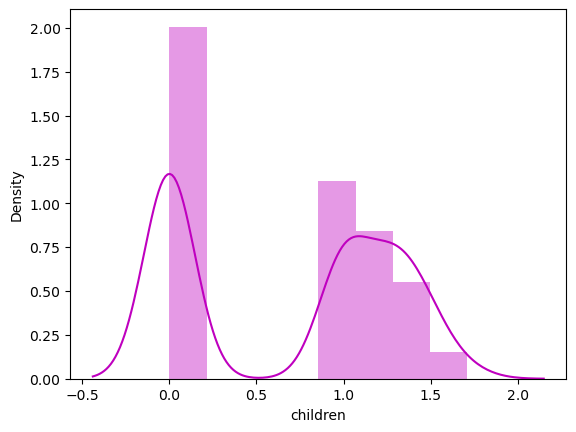

In [47]:
#lets see how the data has been distributed in children after removing skewness
sns.distplot(df['children'],color='m')

### Encoding catogerical column

In [48]:
#encoding catogerical column using ordinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df        

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0.00000,1.0,3.0,16884.92400
1,18,1.0,33.770,1.00000,0.0,2.0,1725.55230
2,28,1.0,33.000,1.44225,0.0,2.0,4449.46200
3,33,1.0,22.705,0.00000,0.0,1.0,21984.47061
4,32,1.0,28.880,0.00000,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,1.44225,0.0,1.0,10600.54830
1334,18,0.0,31.920,0.00000,0.0,0.0,2205.98080
1335,18,0.0,36.850,0.00000,0.0,2.0,1629.83350
1336,21,0.0,25.800,0.00000,0.0,3.0,2007.94500


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   float64
 2   bmi       1334 non-null   float64
 3   children  1334 non-null   float64
 4   smoker    1334 non-null   float64
 5   region    1334 non-null   float64
 6   charges   1334 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 83.4 KB


In [50]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000,1334.000000
mean,39.233883,0.503748,30.601555,0.690614,0.204648,1.514243,13265.622751
std,14.034654,0.500173,6.000927,0.617894,0.403595,1.106222,12089.666548
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.237500,0.000000,0.000000,1.000000,4746.521225
50%,39.000000,1.000000,30.332500,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.595000,1.259921,0.000000,2.000000,16639.912515
max,64.000000,1.000000,48.070000,1.709976,1.000000,3.000000,63770.428010


### corelation between target variable and independent variable

In [51]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.049851,-0.023820,0.002974,0.301360
sex,-0.019041,1.000000,0.037031,0.017140,0.076096,0.003293,0.057165
bmi,0.118887,0.037031,1.000000,0.019930,0.002264,0.155877,0.200799
children,0.049851,0.017140,0.019930,1.000000,0.010463,0.014558,0.071465
smoker,-0.023820,0.076096,0.002264,0.010463,1.000000,-0.002333,0.786536
region,0.002974,0.003293,0.155877,0.014558,-0.002333,1.000000,-0.006404
charges,0.301360,0.057165,0.200799,0.071465,0.786536,-0.006404,1.000000


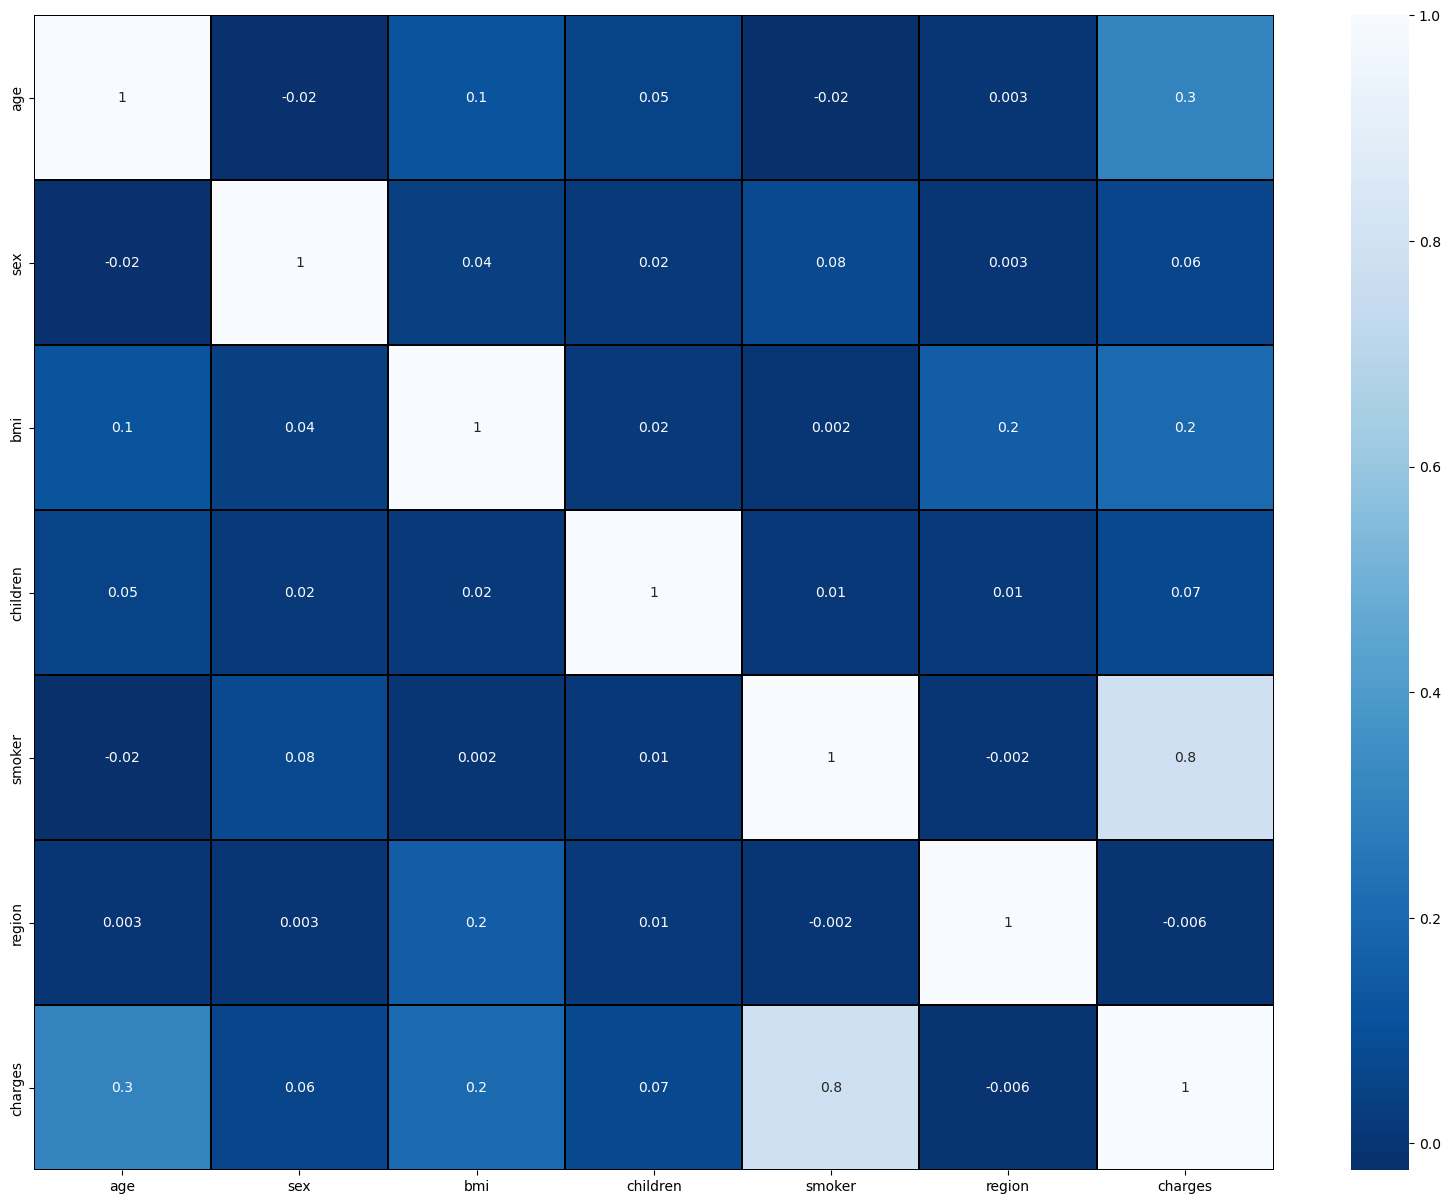

In [52]:
#visualizing corelation matrix using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

#### This heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map.

#### This heatmap contains positive  and negative corelation.

#### The column smoker is highly corelated with charges.

#### The column region is negitevly corelated with charges.

#### all the column except region are positively corelated with the charges.


### seperating features and lable

In [53]:
x=df.drop("charges",axis=1)
y=df["charges"]

### Feature scaling using standard scaler

In [54]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.442249,-1.007525,-0.450359,-1.118109,1.971407,1.343594
1,-1.513528,0.992532,0.528191,0.500899,-0.507252,0.439278
2,-0.800739,0.992532,0.399829,1.216904,-0.507252,0.439278
3,-0.444344,0.992532,-1.316383,-1.118109,-0.507252,-0.465038
4,-0.515623,0.992532,-0.286989,-1.118109,-0.507252,-0.465038
...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.216904,-0.507252,-0.465038
1330,-1.513528,-1.007525,0.219789,-1.118109,-0.507252,-1.369355
1331,-1.513528,-1.007525,1.041637,-1.118109,-0.507252,0.439278
1332,-1.299692,-1.007525,-0.800436,-1.118109,-0.507252,1.343594


### Checking variance inflation factor(VIF)if there is any multicolinearity present in the data

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.018089,age
1,1.007973,sex
2,1.041617,bmi
3,1.003263,children
4,1.006452,smoker
5,1.025337,region


#### we can see all the VIF values are less than 10 so there is no multicolinearity is present.

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [58]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu,"on Random state",maxRS)        
        

maximum r2 score is  0.8121954772882265 on Random state 211


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor

In [62]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_LR))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_LR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_LR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_SCORE 0.8121954772882265
R2_SCORE ON TRAINING DATa 0.715162677363264
MEAN ABSOLUTE ERROR:- 4008.129366392006
MEAN SQUARED ERROR:- 31871912.810280494
ROOT MEAN SQUARED ERROR:- 5645.521482580727


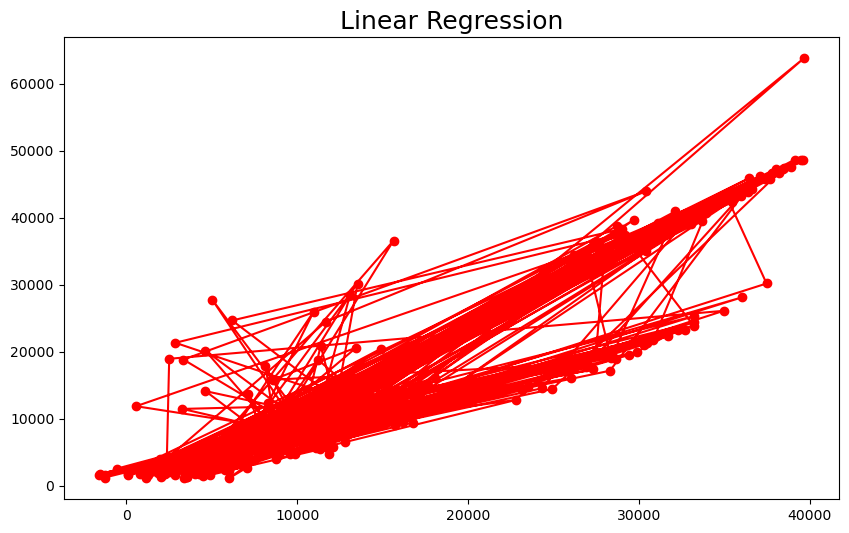

In [63]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,y_test,color='r')
plt.title("Linear Regression",fontsize=18)
plt.show()

In [65]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_GBR))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_GBR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_GBR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_SCORE 0.909382355364477
R2_SCORE ON TRAINING DATa 0.8873958493780145
MEAN ABSOLUTE ERROR:- 2278.3338882111248
MEAN SQUARED ERROR:- 15378530.970358318
ROOT MEAN SQUARED ERROR:- 3921.547012386606


In [66]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_RFR))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_RFR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_RFR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_SCORE 0.892125734040319
R2_SCORE ON TRAINING DATa 0.9715062626386431
MEAN ABSOLUTE ERROR:- 2455.6824260099756
MEAN SQUARED ERROR:- 18307116.088021785
ROOT MEAN SQUARED ERROR:- 4278.681582920349


In [68]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
pred_train=DT.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_DT))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_DT))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_DT))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_DT)))

R2_SCORE 0.7588432731298441
R2_SCORE ON TRAINING DATA 1.0
MEAN ABSOLUTE ERROR:- 3117.085112588529
MEAN SQUARED ERROR:- 40926203.8072121
ROOT MEAN SQUARED ERROR:- 6397.359127578512


In [70]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_knn))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_knn))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_knn))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_SCORE 0.8625004610855898
R2_SCORE ON TRAINING DATA 0.845005647631117
MEAN ABSOLUTE ERROR:- 3149.6798757551123
MEAN SQUARED ERROR:- 23334759.208432637
ROOT MEAN SQUARED ERROR:- 4830.606505236443


In [71]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_svr))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_svr))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_svr))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_SCORE -0.11597309361522634
R2_SCORE ON TRAINING DATA -0.0915183272719855
MEAN ABSOLUTE ERROR:- 8992.978883192018
MEAN SQUARED ERROR:- 189389459.98074043
ROOT MEAN SQUARED ERROR:- 13761.884317953716


In [73]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_lasso))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_lasso))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_lasso))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_SCORE 0.812175355476916
R2_SCORE ON TRAINING DATA 0.7151626301623213
MEAN ABSOLUTE ERROR:- 4008.2331696369656
MEAN SQUARED ERROR:- 31875327.64079902
ROOT MEAN SQUARED ERROR:- 5645.823911600416


In [74]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_rd))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_rd))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_rd))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_SCORE 0.8120401085767172
R2_SCORE ON TRAINING DATa 0.7151617605159659
MEAN ABSOLUTE ERROR:- 4010.446056928871
MEAN SQUARED ERROR:- 31898280.109401777
ROOT MEAN SQUARED ERROR:- 5647.856240150043


In [75]:
from sklearn.model_selection import cross_val_score

In [77]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.76217381 0.70725587 0.77552595 0.73450328 0.75418665]
0.7467291106057534
Difference between R2 score and cross validation score is -  6.546636668247308


In [79]:
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.87324203 0.79857348 0.8911523  0.85022343 0.86072054]
0.854782356063415
Difference between R2 score and cross validation score is -  -4.258687877518852


In [80]:
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.848102   0.77291942 0.86857144 0.8273278  0.8532537 ]
0.834034871642848
Difference between R2 score and cross validation score is -  -2.1839394354621455


In [81]:
score=cross_val_score(DT,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.76213029 0.63828452 0.73328799 0.71735496 0.72042444]
0.7142964404486246
Difference between R2 score and cross validation score is -  9.789903683960189


In [82]:
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.8288612  0.7564828  0.83868525 0.79951532 0.8155194 ]
0.8078127924543465
Difference between R2 score and cross validation score is -  0.4382684833880046


In [83]:
score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[-0.11003884 -0.10936883 -0.07315882 -0.10136101 -0.10635853]
-0.10005720540025158
Difference between R2 score and cross validation score is -  91.2252682688478


In [84]:
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.76217989 0.70729257 0.77550518 0.73449849 0.75419508]
0.7467342440324041
Difference between R2 score and cross validation score is -  6.546123325582243


In [85]:
score=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.76217863 0.70736467 0.77541011 0.73456273 0.75415814]
0.7467348576172881
Difference between R2 score and cross validation score is -  6.546061967093841


#### from the difference of both r2 score and crossvalidation score computed on r2 score we can conclude that knn  is our best model.

### Lets do hyperparameter tuning to improve the model performance


In [117]:
param_grid = {'algorithm' :['kd_tree','brute','ball_tree'],
             'leaf_size': range(1,100,2),
             'n_neighbors': range(1,80),
              'weights':['distance'],
              'n_jobs':[-2,-1,1]
             }

In [118]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)
             

In [ ]:
gridsearch.fit(x_train,y_train)

In [ ]:
gridsearch.best_score_

In [ ]:
gridsearch.best_estimator_

In [108]:
#we will use best parameter in our knn algorithim and check if r2 score is increasing.
knn=KNN(algorithm='kd_tree',leaf_size=2,n_neighbors=13,n_jobs=-2,weights='distance')
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=2, n_jobs=-2, n_neighbors=13,
                    weights='distance')

In [109]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print('R2_SCORE',r2_score(y_test,pred))

print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred)))


R2_SCORE 0.8685934560939469
MEAN ABSOLUTE ERROR:- 3062.4769757987647
MEAN SQUARED ERROR:- 22300729.76731068
ROOT MEAN SQUARED ERROR:- 4722.364849025399


In [110]:
import pickle
filename='Insurance_cost.pkl'
pickle.dump(knn,open(filename,'wb'))

In [111]:
import pickle
loaded_model=pickle.load(open('Insurance_cost.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.8593456093947


In [112]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
predicted,2755.736917,6075.589893,9082.356107,1631.82120,13512.703518,17834.70375,3463.461126,14017.186841,11774.510874,9245.344315,...,12602.691466,8424.757174,24732.146365,3442.927289,3053.380715,12919.546986,1933.898441,8998.816109,3022.040067,6645.941787
original,2855.437550,4670.640000,9386.161300,14133.03775,7624.630000,12829.45510,3989.841000,12557.605300,11842.442000,5428.727700,...,9957.721600,8062.764000,23244.790200,3044.213300,1815.875900,12096.651200,11482.634850,7348.142000,17878.900680,4673.392200
